In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
# df = pd.read_csv("data/compas-scores-raw.csv")
df = pd.read_csv("data/compas-scores-two-years.csv")
print(len(df))
df.head()


7214


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [3]:
# Filtering 
ndf = df[(df.days_b_screening_arrest <= 30)
            & (df.days_b_screening_arrest >= -30)
            & (df.is_recid != -1)
            & (df.c_charge_degree != 'O')
            & (df.score_text != 'N/A')
            ]
ndf.head()


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
5,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1


In [4]:
features_to_keep=['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 
                    'sex', 'priors_count', 'days_b_screening_arrest', 'decile_score', 
                    'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out']
ndf = ndf[features_to_keep]
ndf["length_of_stay"] = pd.to_datetime(ndf["c_jail_out"])- pd.to_datetime(ndf["c_jail_in"])
ndf.length_of_stay = ndf.length_of_stay.astype('timedelta64[h]') # Convert to hours

print("Correlation btw length of stay and decile score", ndf["decile_score"].corr(ndf["length_of_stay"]))

Correlation btw length of stay and decile score 0.2074107615030343


In [5]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7213
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      6172 non-null   int64  
 1   c_charge_degree          6172 non-null   object 
 2   race                     6172 non-null   object 
 3   age_cat                  6172 non-null   object 
 4   score_text               6172 non-null   object 
 5   sex                      6172 non-null   object 
 6   priors_count             6172 non-null   int64  
 7   days_b_screening_arrest  6172 non-null   float64
 8   decile_score             6172 non-null   int64  
 9   is_recid                 6172 non-null   int64  
 10  two_year_recid           6172 non-null   int64  
 11  c_jail_in                6172 non-null   object 
 12  c_jail_out               6172 non-null   object 
 13  length_of_stay           6172 non-null   float64
dtypes: float64(2), int64(5),

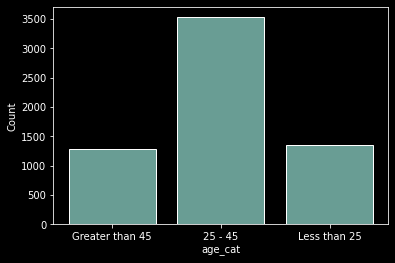

25 - 45            3532
Less than 25       1347
Greater than 45    1293
Name: age_cat, dtype: int64

In [32]:
ax = sns.histplot(data=ndf["age_cat"], discrete=True, shrink=0.8)
plt.show()

ndf["age_cat"].value_counts()

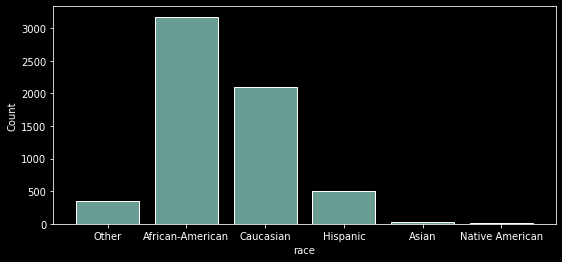

African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: race, dtype: int64

In [33]:
plt.figure(figsize=(9,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data=ndf["race"], discrete=True, shrink=0.8)
plt.show()

ndf["race"].value_counts()


In [34]:
print("Black defendants: %.2f%%" %            (3175 / 6172 * 100))
print("White defendants: %.2f%%" %            (2103 / 6172 * 100))
print("Hispanic defendants: %.2f%%" %         (509  / 6172 * 100))
print("Asian defendants: %.2f%%" %            (31   / 6172 * 100))
print("Native American defendants: %.2f%%" %  (11   / 6172 * 100))

Black defendants: 51.44%
White defendants: 34.07%
Hispanic defendants: 8.25%
Asian defendants: 0.50%
Native American defendants: 0.18%


In [37]:
print("Men: %.2f%%" %   (4997 / 6172 * 100))
print("Women: %.2f%%" % (1175 / 6172 * 100))
ndf["sex"].value_counts()


Men: 80.96%
Women: 19.04%


Male      4997
Female    1175
Name: sex, dtype: int64

In [45]:
c = len(ndf[ndf["two_year_recid"] == 1]) / len(ndf) * 100
print(f"Recidivism rate  {round(c,2)} %")

Recidivism rate  45.51 %


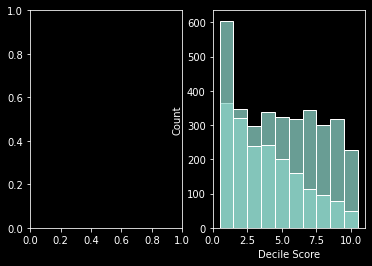

In [64]:
pblack = ndf[ndf["race"] == "African-American"]
pwhite = ndf[ndf["race"] == "Caucasian"]
fig, ax = plt.subplots(1,2)
sns.histplot(pblack, x="decile_score", discrete=True)
sns.histplot(pwhite, x="decile_score", discrete=True)
f2.set(xlabel='Decile Score')

plt.show()